In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statsmodels.api as sm
import xgboost as xgb

from scipy.stats import chi2_contingency
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder,
                                   RobustScaler
                                  )
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     StratifiedKFold,
                                     KFold,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     HalvingGridSearchCV
                                    )
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              HistGradientBoostingClassifier
                             )
from sklearn.svm import LinearSVC
from sklearn.inspection import permutation_importance
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             f1_score,
                             accuracy_score,
                             )
from imblearn.over_sampling import SMOTE, RandomOverSampler

Business Analysis and Problem Statement:
The dataset is from a global finance company. Over the years, the company has collected basic banking information and customer credit-related data. We will determine which variables are most relevant to predict an individual's credit score based on specific attributes, obtain the credit score support from customers, and classify them according to the result to minimize manual effort.


Objective:
Given a person's credit information, we will create a machine learning model that can classify the credit score.

The problem and/or objective stated aim at evaluating creditworthiness. Financial solvency defines an individual's or entity's ability to meet all their obligations. The credit score is a number that determines their credit behavior, how likely they are to make loan payments, and their punctuality in making payments, i.e., their ability to handle present or future debts.

To achieve our goal, we will use supervised classification models, where we will evaluate the results to solve the problem stated and achieve the objective.

The credit score is typically based on five factors:

- 35% of the score is based on payment history.
- 30% is the amount owed.
- 15% is the length of credit history.
- 10% is the credit mix.
- The remaining 10% is new credit activity.

Initial Data Analysis
We will conduct an initial analysis of the data to understand it and observe which variables we have available.

In [3]:
train = pd.read_csv('train.csv')
train

<ipython-input-3-3865ee447975>:1: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [4]:
train.shape


(100000, 28)

In [5]:
train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [6]:
train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [8]:
train.head(5).T


,0,1,2,3,4
ID,0x1602,0x1603,0x1604,0x1605,0x1606
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN,NaN,1824.843333
Num_Bank_Accounts,3,3,3,3,3


In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [12]:
sns.set_style("dark")
sns.color_palette("Paired")


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [30]:
from pickle import NONE
def detail_col(df, col,ax=NONE):

    print(f"Variable: ", col,
          "\nFormato: ", df[col].dtype,
          "\nCantidad de valores nulos: ", df[col].isnull().sum(),
          "\nValores únicos: ", df[col].nunique(),
          "\nDistribución de los valores: \n", df[col].value_counts())

<ipython-input-31-9e59461d4f64>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




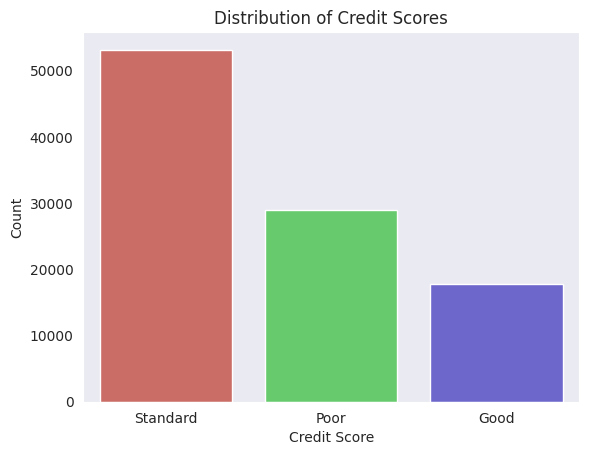

In [31]:
credit_score_counts = train['Credit_Score'].value_counts()

sns.barplot(x=credit_score_counts.index, y=credit_score_counts.values, palette='hls')

plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')

plt.show()


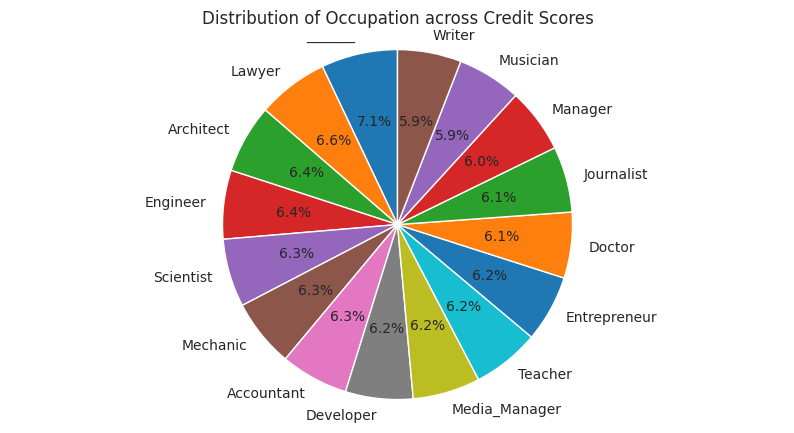

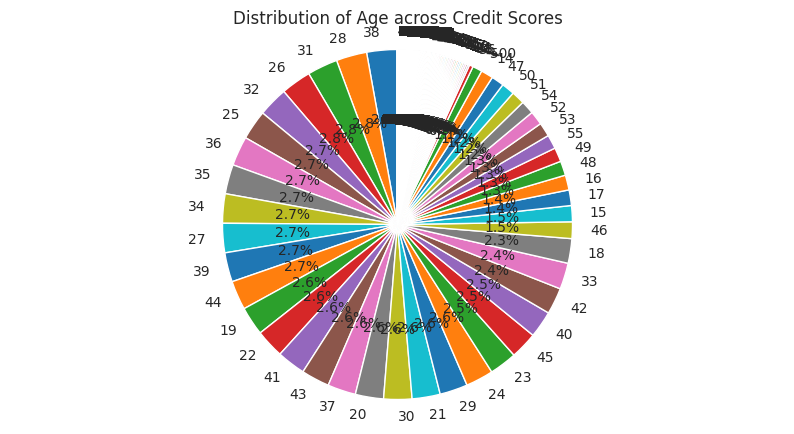

In [32]:
#pie chart-occupation
occupation_counts = train['Occupation'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Occupation across Credit Scores')
plt.axis('equal')
plt.show()

# Pie chart-Age
age_counts = train['Age'].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age across Credit Scores')
plt.axis('equal')
plt.show()


Variable:  Monthly_Inhand_Salary 
Formato:  float64 
Cantidad de valores nulos:  15002 
Valores únicos:  13235 
Distribución de los valores: 
 6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

 ------------------------------------------------------------------------------- 

Variable:  Annual_Income 
Formato:  object 
Cantidad de valores nulos:  0 
Valores únicos:  18940 
Distribución de los valores: 
 36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

 ------------------------------------------------------------------------------- 



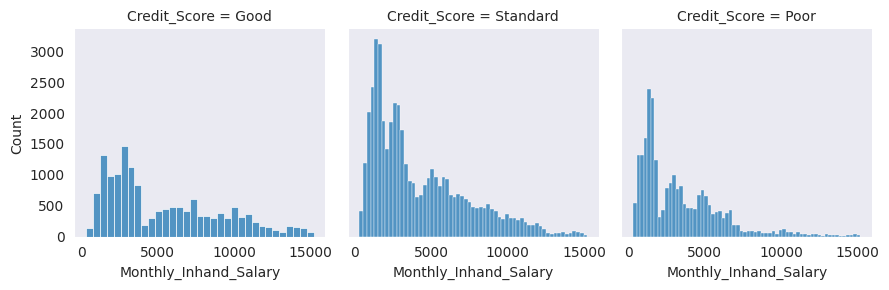

In [39]:
detail_col(train, 'Monthly_Inhand_Salary')
print('\n', '-'*79, '\n')
detail_col(train, 'Annual_Income')
print('\n', '-'*79, '\n')

pic1 = sns.FacetGrid(train, col='Credit_Score')
pic1.map(sns.histplot, 'Monthly_Inhand_Salary')



plt.show()


Variable:  Num_Credit_Card 
Formato:  int64 
Cantidad de valores nulos:  0 
Valores únicos:  1179 
Distribución de los valores: 
 5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

 ------------------------------------------------------------------------------- 

Variable:  Num_Bank_Accounts 
Formato:  int64 
Cantidad de valores nulos:  0 
Valores únicos:  943 
Distribución de los valores: 
 6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

 ------------------------------------------------------------------------------- 



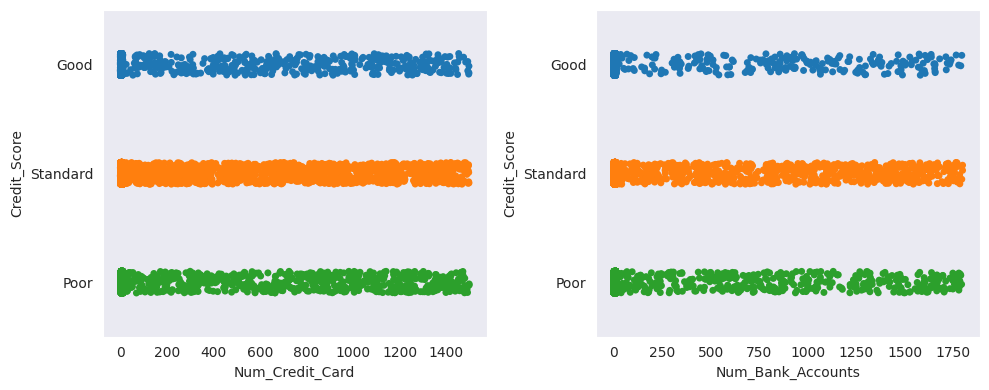

In [41]:
detail_col(train, 'Num_Credit_Card')
print('\n', '-'*79, '\n')
detail_col(train, 'Num_Bank_Accounts')
print('\n', '-'*79, '\n')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.stripplot(
    data=train,
    x='Num_Credit_Card',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[0]
)

sns.stripplot(
    data=train,
    x='Num_Bank_Accounts',
    y='Credit_Score',
    hue="Credit_Score",
    legend=False,
    ax=axes[1]
)

plt.tight_layout()

plt.show()

Variable:  Num_of_Loan 
Formato:  object 
Cantidad de valores nulos:  0 
Valores únicos:  434 
Distribución de los valores: 
 3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

 ------------------------------------------------------------------------------- 

Variable:  Type_of_Loan 
Formato:  object 
Cantidad de valores nulos:  11408 
Valores únicos:  6260 
Distribución de los valores: 
 Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan        

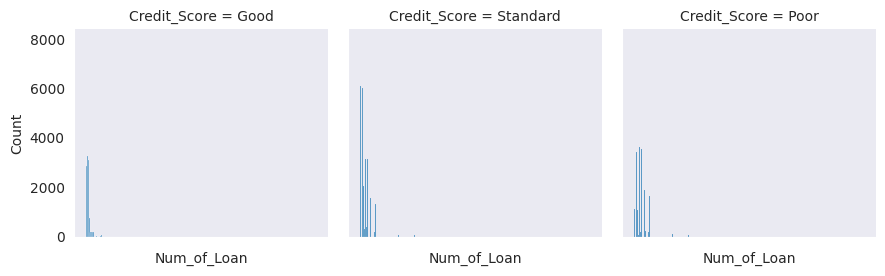

In [46]:
detail_col(train, 'Num_of_Loan')
print('\n', '-'*79, '\n')
detail_col(train, 'Type_of_Loan')
print('\n', '-'*79, '\n')
detail_col(train, 'Outstanding_Debt')
print('\n', '-'*79, '\n')

pic2 = sns.FacetGrid(train, col='Credit_Score')
pic2.map(sns.histplot, 'Num_of_Loan')
pic2.set(xticklabels=[])

plt.show()

Variable:  Delay_from_due_date 
Formato:  int64 
Cantidad de valores nulos:  0 
Valores únicos:  73 
Distribución de los valores: 
  15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: Delay_from_due_date, Length: 73, dtype: int64
Variable:  Num_of_Delayed_Payment 
Formato:  object 
Cantidad de valores nulos:  7002 
Valores únicos:  749 
Distribución de los valores: 
 19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64


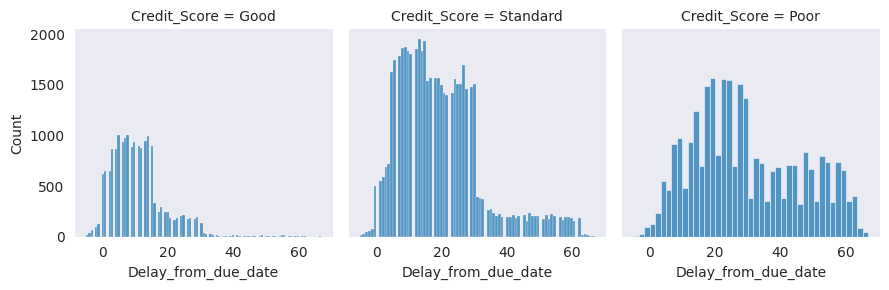

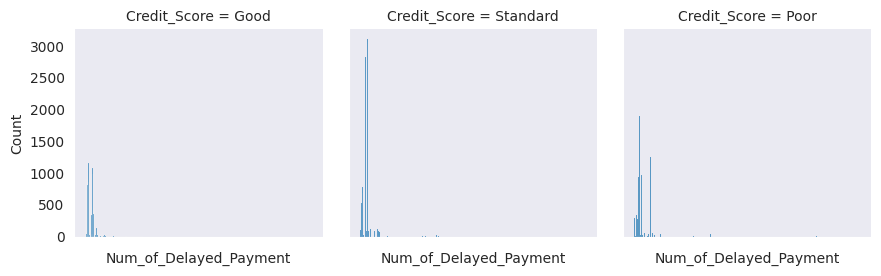

In [49]:
detail_col(train, 'Delay_from_due_date')
detail_col(train, 'Num_of_Delayed_Payment')


pic4 = sns.FacetGrid(train, col='Credit_Score', height=3, aspect=1)
pic4.map(sns.histplot, 'Delay_from_due_date')

pic5= sns.FacetGrid(train, col='Credit_Score', height=3, aspect=1)
pic5.map(sns.histplot, 'Num_of_Delayed_Payment')
pic5.set(xticklabels=[])

# Mostrar los gráficos

plt.show()


Variable:  Payment_of_Min_Amount 
Formato:  object 
Cantidad de valores nulos:  0 
Valores únicos:  3 
Distribución de los valores: 
 Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64
Variable:  Payment_Behaviour 
Formato:  object 
Cantidad de valores nulos:  0 
Valores únicos:  7 
Distribución de los valores: 
 Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64


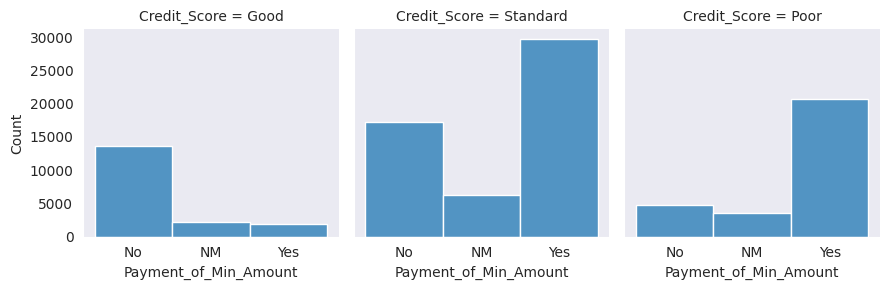


 ------------------------------------------------------------------------------- 



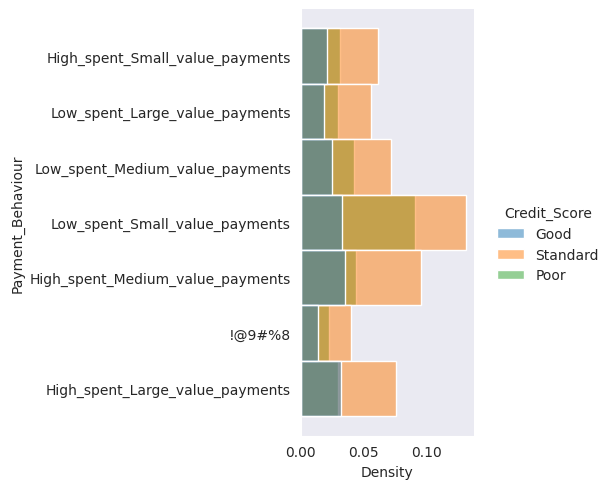

In [53]:
detail_col(train, 'Payment_of_Min_Amount')
detail_col(train, 'Payment_Behaviour')

pic6 = sns.FacetGrid(train, col='Credit_Score')
pic6.map(sns.histplot, 'Payment_of_Min_Amount')

plt.show()

print('\n', '-'*79, '\n')


sns.displot(train,
            y='Payment_Behaviour',
            hue='Credit_Score',
            stat='density')

In [54]:
train['Delay_from_due_date'] = (
    train['Delay_from_due_date'].apply(lambda x: np.NaN if x<0 else x)
)
train['Delay_from_due_date'] = (
    train['Delay_from_due_date'].ffill(axis=0)
)

# Corroboramos los datos de la variable

detail_col(train, 'Delay_from_due_date')

Variable:  Delay_from_due_date 
Formato:  float64 
Cantidad de valores nulos:  0 
Valores únicos:  68 
Distribución de los valores: 
 15.0    3599
13.0    3429
8.0     3329
14.0    3313
10.0    3282
        ... 
63.0      69
64.0      64
65.0      56
66.0      32
67.0      22
Name: Delay_from_due_date, Length: 68, dtype: int64


In [55]:
train['Changed_Credit_Limit'] = (
    train['Changed_Credit_Limit'].apply(
        lambda x: np.NaN if x=='_' else x).astype('float64')
)
train['Changed_Credit_Limit'] = (
    train['Changed_Credit_Limit'].ffill(axis=0)
)

detail_col(train, 'Changed_Credit_Limit')

Variable:  Changed_Credit_Limit 
Formato:  float64 
Cantidad de valores nulos:  0 
Valores únicos:  4383 
Distribución de los valores: 
  8.22     136
 11.50    128
 11.32    126
 10.06    125
 7.35     124
         ... 
-3.67       1
 29.44      1
 35.30      1
-2.85       1
 21.17      1
Name: Changed_Credit_Limit, Length: 4383, dtype: int64


In [57]:
train['Num_Credit_Inquiries'] = (
    train['Num_Credit_Inquiries'].apply(
        lambda x: np.NaN if x<0 or x>20 else x)
)

train['Num_Credit_Inquiries'] = (
    train['Num_Credit_Inquiries'].ffill(axis=0)
)

# Corroboramos los datos de la variable

detail_col(train, 'Num_Credit_Inquiries')

Variable:  Num_Credit_Inquiries 
Formato:  float64 
Cantidad de valores nulos:  0 
Valores únicos:  18 
Distribución de los valores: 
 4.0     11716
3.0      9191
6.0      8386
2.0      8370
7.0      8367
8.0      8141
1.0      7865
0.0      7245
5.0      5910
9.0      5478
11.0     5248
10.0     5116
12.0     4731
13.0     1536
14.0     1083
15.0      840
16.0      479
17.0      298
Name: Num_Credit_Inquiries, dtype: int64


In [58]:
train['Credit_Mix'] = (
    train['Credit_Mix'].apply(
        lambda x: np.NaN if x=='_' else x)
)


train['Credit_Mix'] = (
    train.groupby('Customer_ID')['Credit_Mix'].transform(
        lambda v: v.mode()[0]).astype("category")
)

detail_col(train, 'Credit_Mix')

Variable:  Credit_Mix 
Formato:  category 
Cantidad de valores nulos:  0 
Valores únicos:  3 
Distribución de los valores: 
 Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64


In [59]:
train['Payment_of_Min_Amount'] = (
    train['Payment_of_Min_Amount'].str.replace('NM', 'No').astype("category")
)
detail_col(train, 'Payment_of_Min_Amount')

Variable:  Payment_of_Min_Amount 
Formato:  category 
Cantidad de valores nulos:  0 
Valores únicos:  2 
Distribución de los valores: 
 Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64


In [60]:
train['Payment_Behaviour'] = (
    train['Payment_Behaviour'].apply(
        lambda x: np.NaN if x=='!@9#%8' else x)
)

train['Payment_Behaviour'] = (
    train.groupby('Customer_ID')['Payment_Behaviour'].transform(
        lambda v: v.mode()[0]).astype("category")
)

# Corroboramos los datos de la variable

detail_col(train, 'Payment_Behaviour')

Variable:  Payment_Behaviour 
Formato:  category 
Cantidad de valores nulos:  0 
Valores únicos:  6 
Distribución de los valores: 
 Low_spent_Small_value_payments      30880
High_spent_Medium_value_payments    24688
High_spent_Large_value_payments     21808
Low_spent_Medium_value_payments      9088
High_spent_Small_value_payments      7776
Low_spent_Large_value_payments       5760
Name: Payment_Behaviour, dtype: int64


In [61]:
train['Credit_Score'] = (
    train['Credit_Score'].astype("category")
)
detail_col(train, 'Credit_Score')

Variable:  Credit_Score 
Formato:  category 
Cantidad de valores nulos:  0 
Valores únicos:  3 
Distribución de los valores: 
 Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64


In [62]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.108440,10.389784,5.780270,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.822424,6.790119,3.862931,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,0.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.330000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,5.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.860000,8.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,17.000000,50.000000,82331.000000


In [63]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  object  
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  object  
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

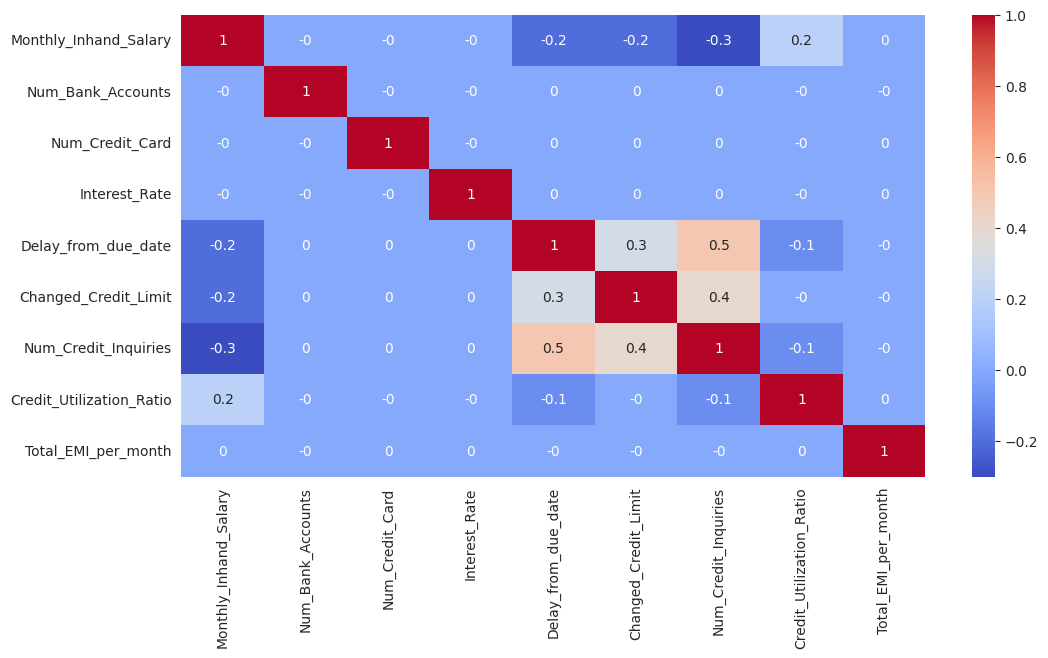

In [64]:
matrix = train.corr(numeric_only=True).round(1)

plt.figure(figsize=(12, 6))

ax = sns.heatmap(matrix, annot=True, cmap="coolwarm")


In [65]:
df_dummies = train['Type_of_Loan'].str.get_dummies(sep=',')

df_credit =train.drop(columns='Type_of_Loan')
df_credit = pd.concat([df_credit, df_dummies], axis=1)

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0    Auto Loan                    100000 non-null  int64
 1    Credit-Builder Loan          100000 non-null  int64
 2    Debt Consolidation Loan      100000 non-null  int64
 3    Home Equity Loan             100000 non-null  int64
 4    Mortgage Loan                100000 non-null  int64
 5    Not Specified                100000 non-null  int64
 6    Payday Loan                  100000 non-null  int64
 7    Personal Loan                100000 non-null  int64
 8    Student Loan                 100000 non-null  int64
 9    and Auto Loan                100000 non-null  int64
 10   and Credit-Builder Loan      100000 non-null  int64
 11   and Debt Consolidation Loan  100000 non-null  int64
 12   and Home Equity Loan         100000 non-null  int64
 13   and Mortgage L